Parameters to set:

up, down, left, right

thresh_corr_diff


## Images

In [6]:
import heapq
import os
import sys
import numpy as np
import pandas as pd
from skimage import io, img_as_float32
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.segmentation import find_boundaries
from scipy import ndimage
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append("../bardensr")
import bardensr
import bardensr.plotting
from DeCRISP import DeCRISP as dcp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
n_channels = 2
n_cycles = 5

In [3]:
with open('./data/registered20210714_sg2NEB.npy', 'rb') as f:
    X = np.load(f)

In [4]:
X.shape

(10, 1, 2048, 1280)

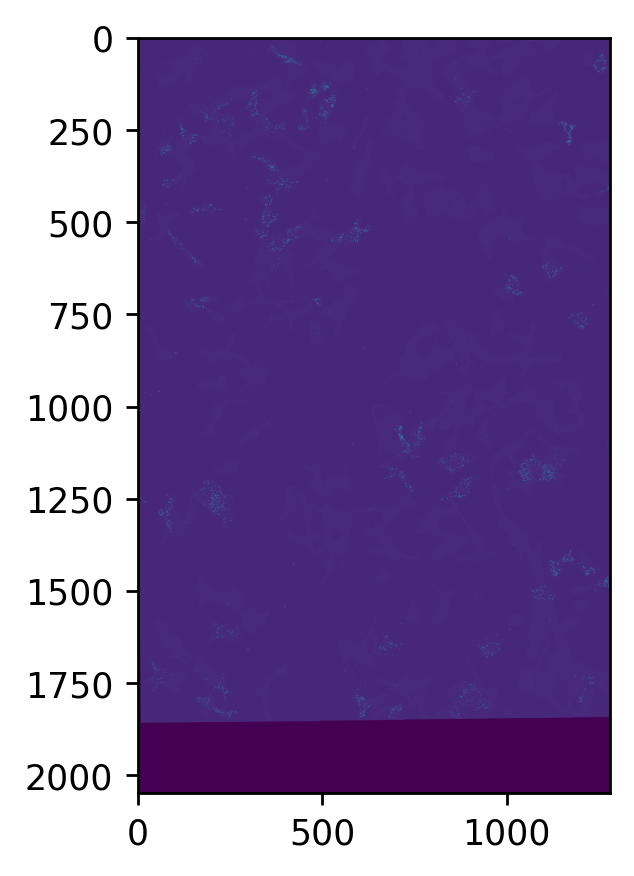

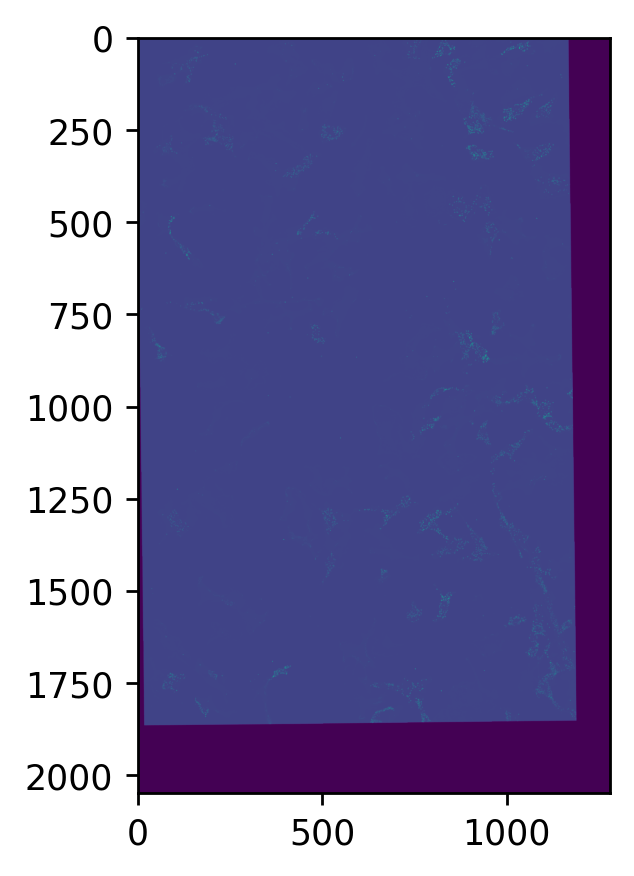

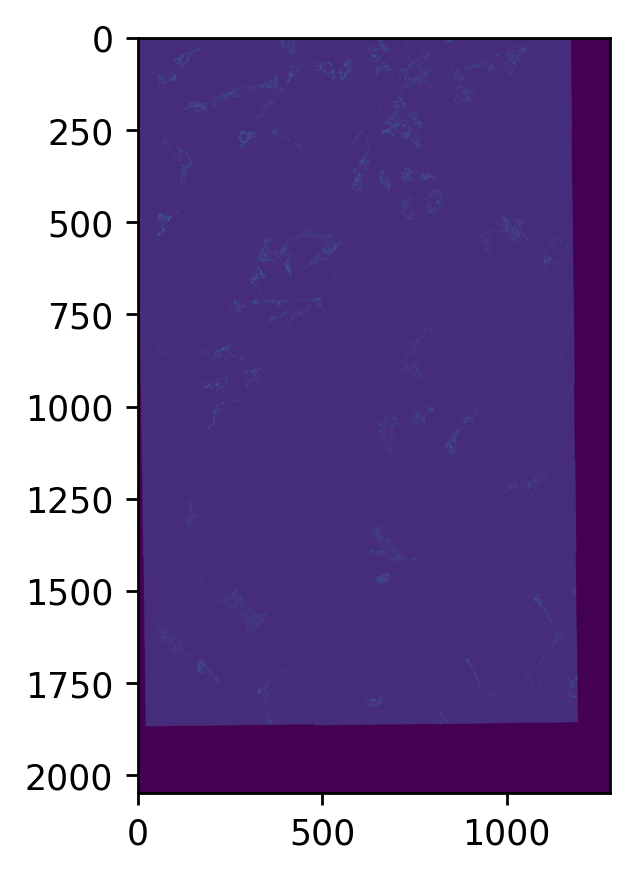

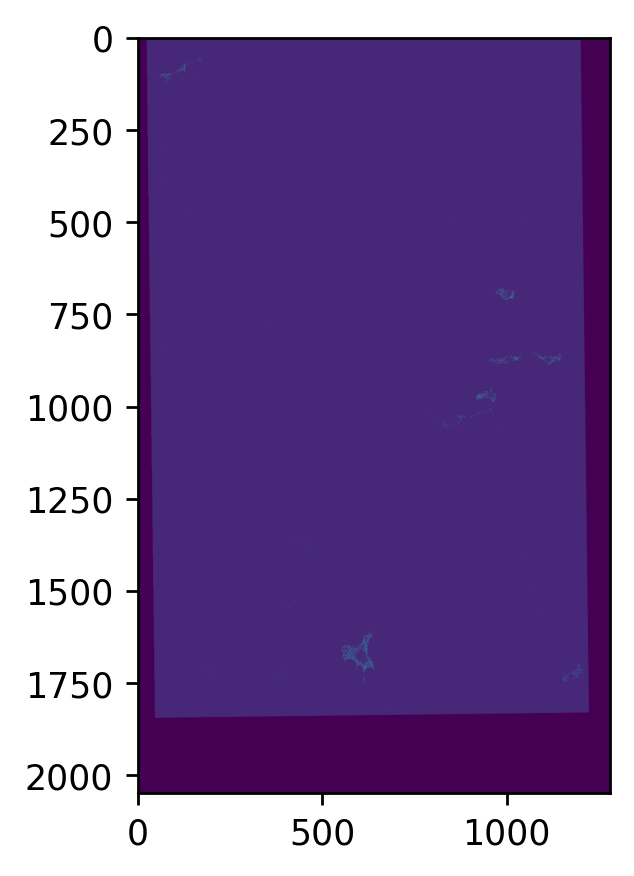

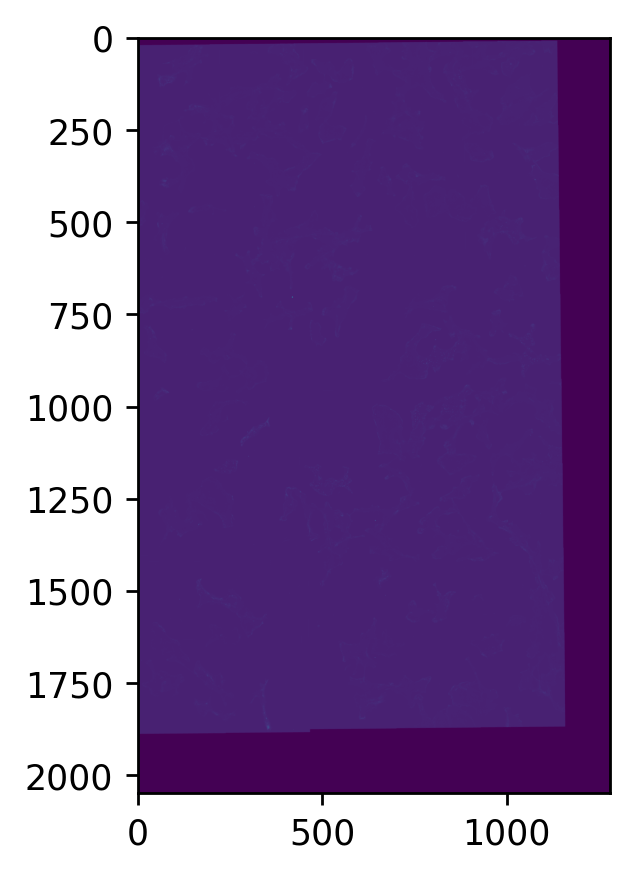

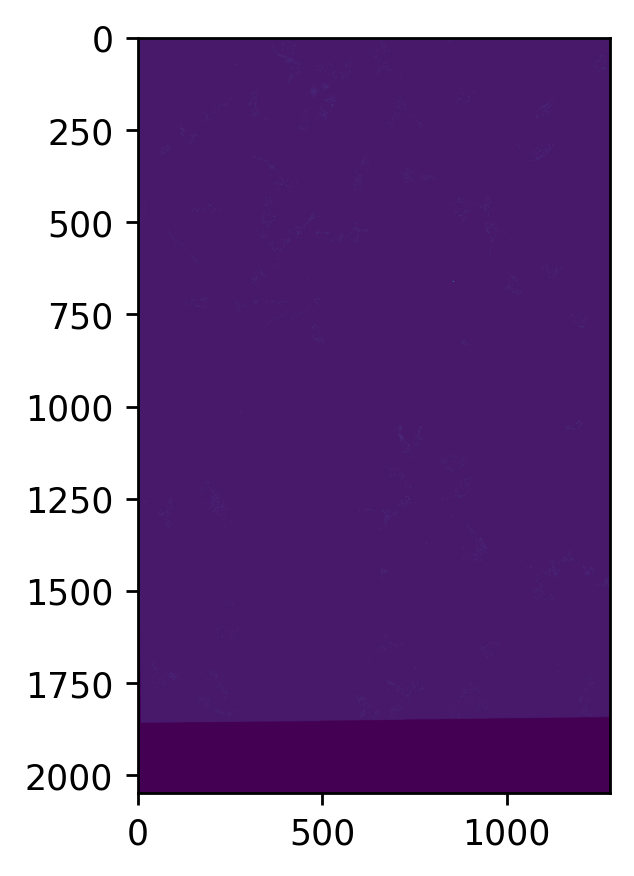

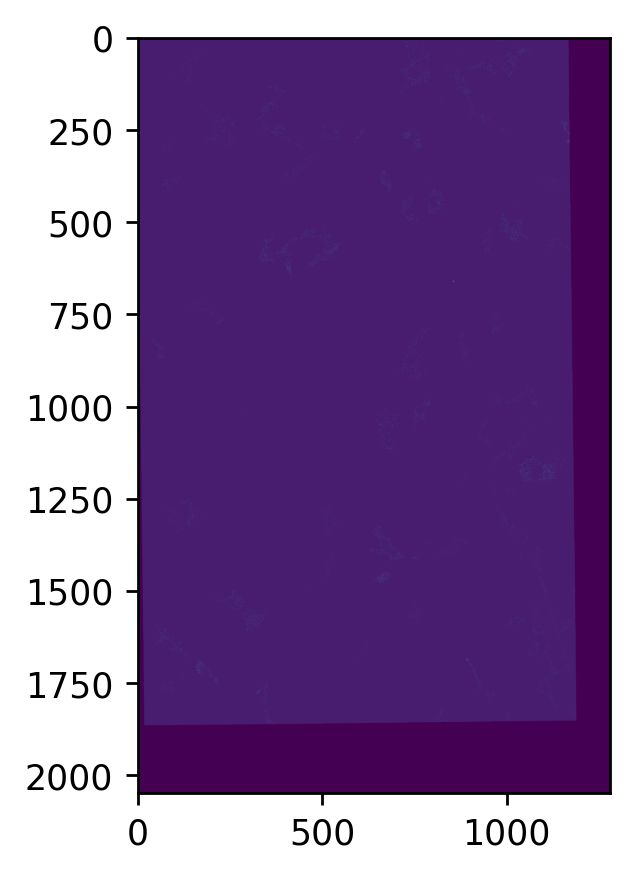

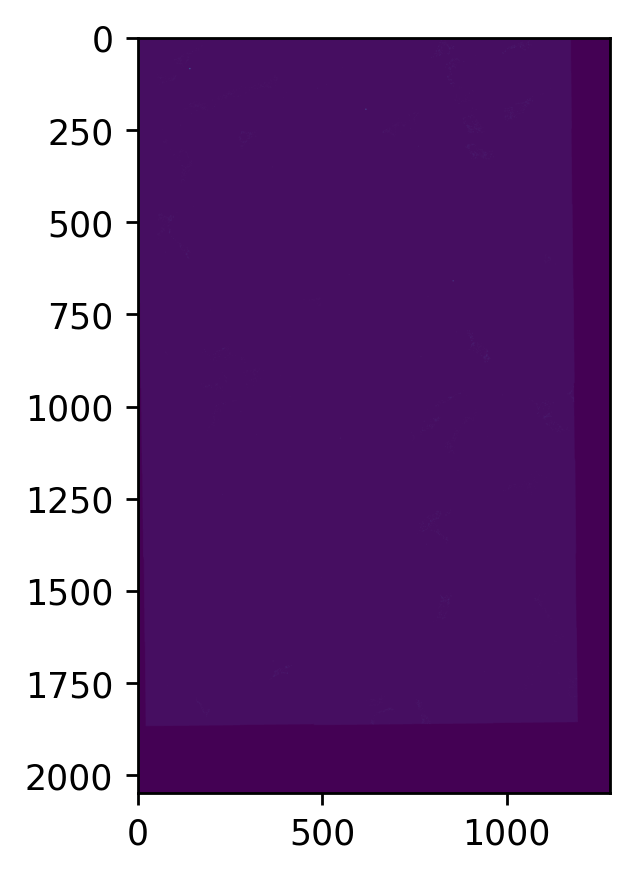

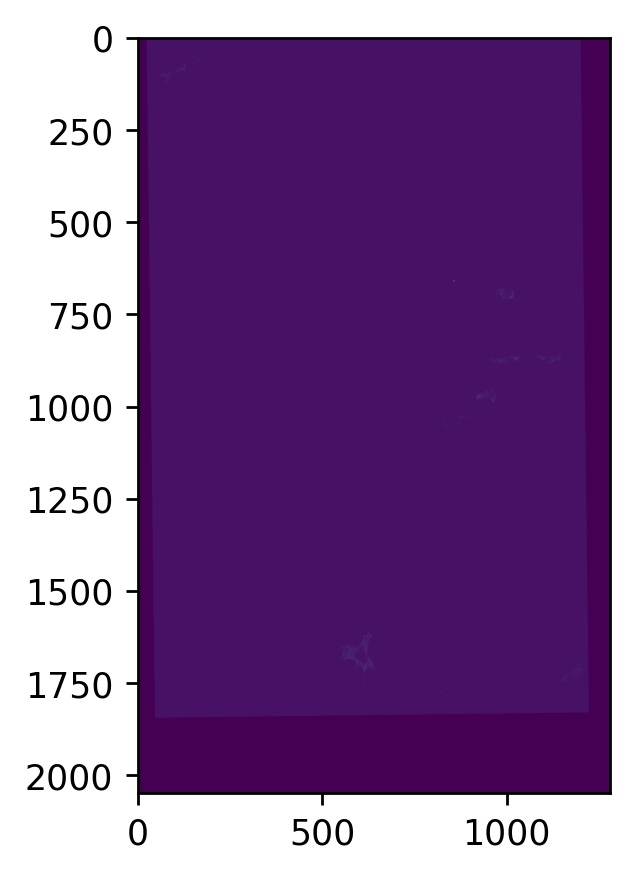

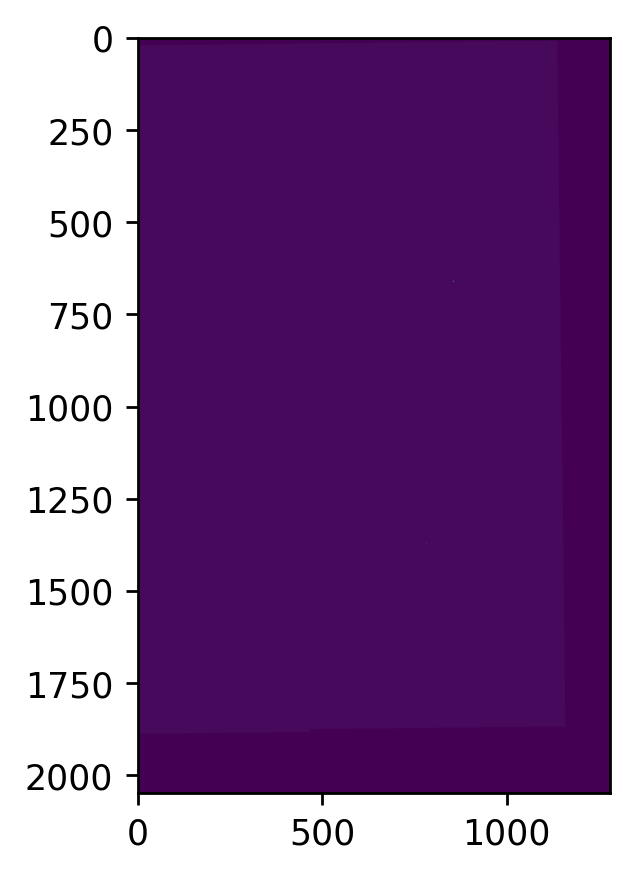

In [5]:
for i in range(X.shape[0]):
    plt.figure(dpi=250)
    plt.imshow(X[i, 0,])

In [4]:
up = 0
down = 1800
left = 10
right = 1150

Xcenter = dcp.remove_border(X, up=up, down=down, left=left, right=right)

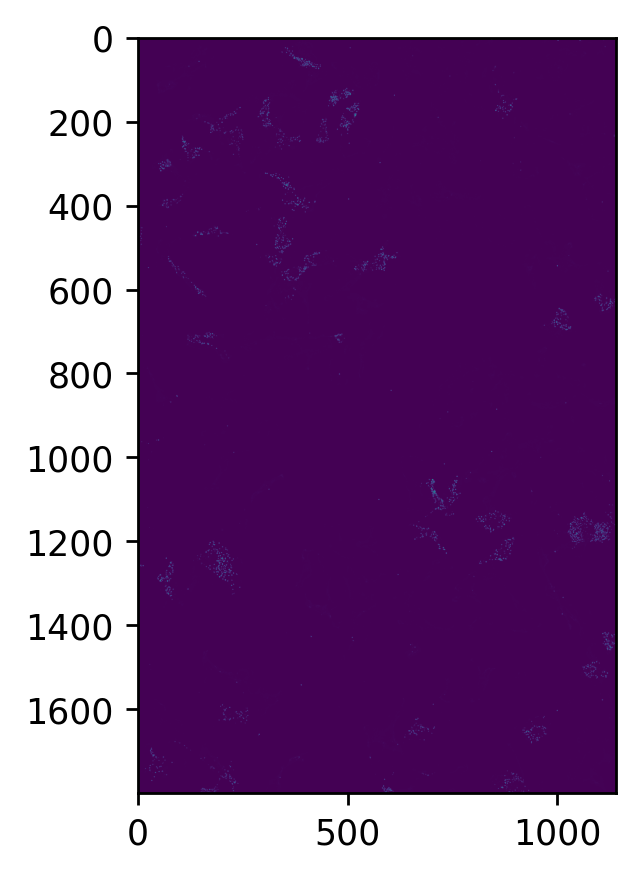

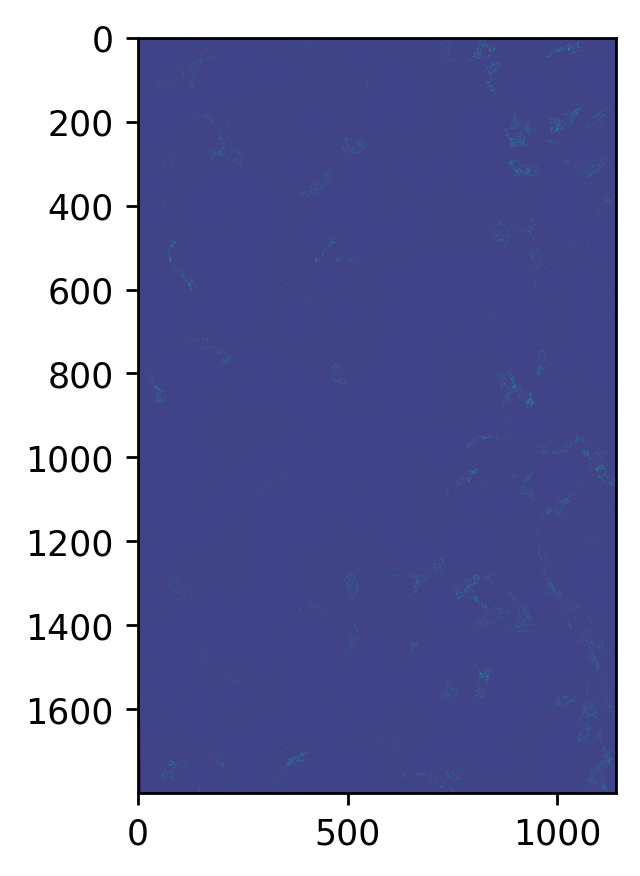

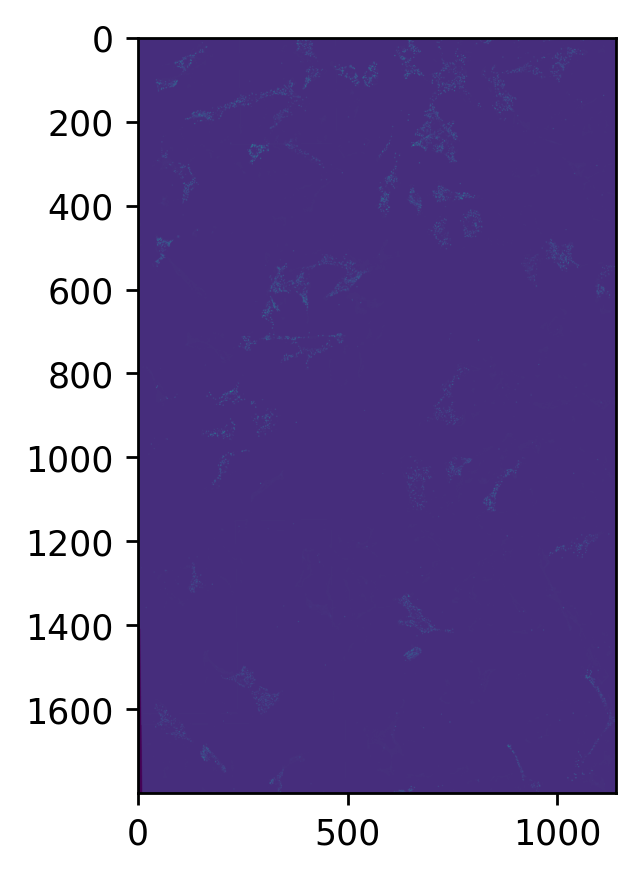

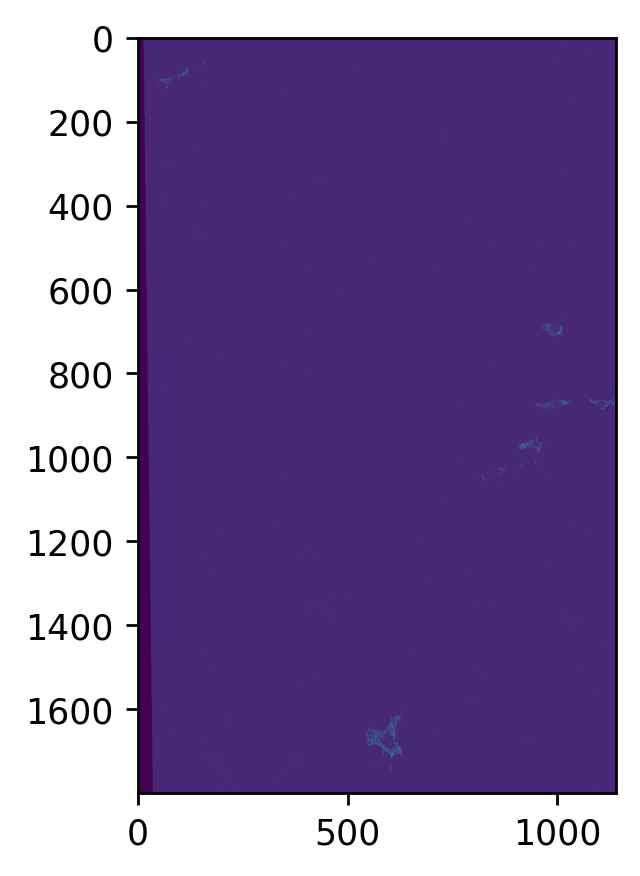

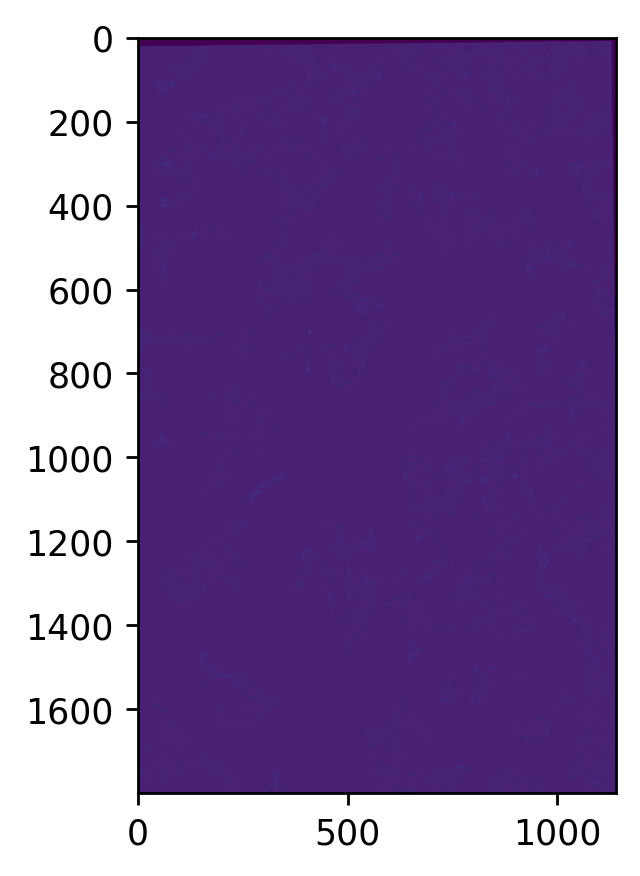

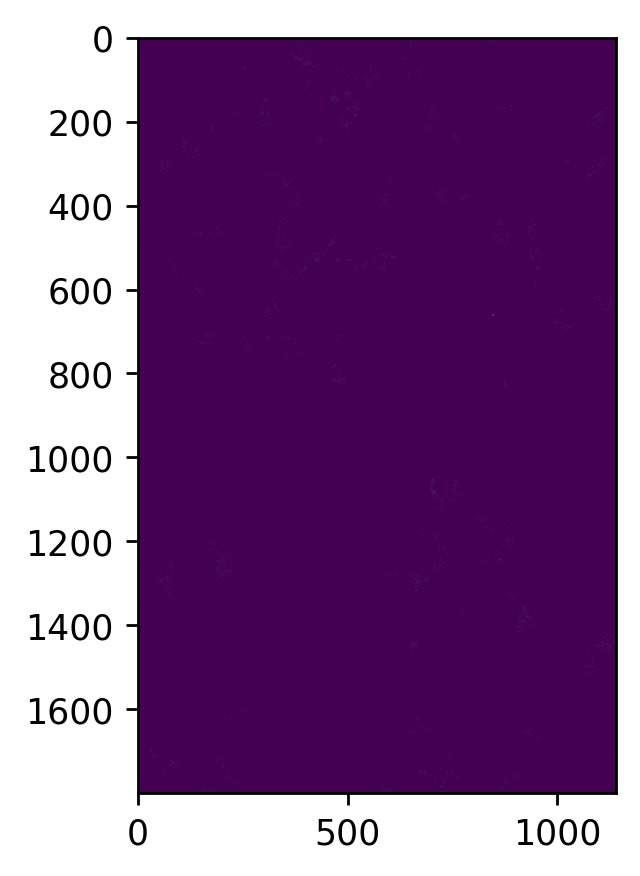

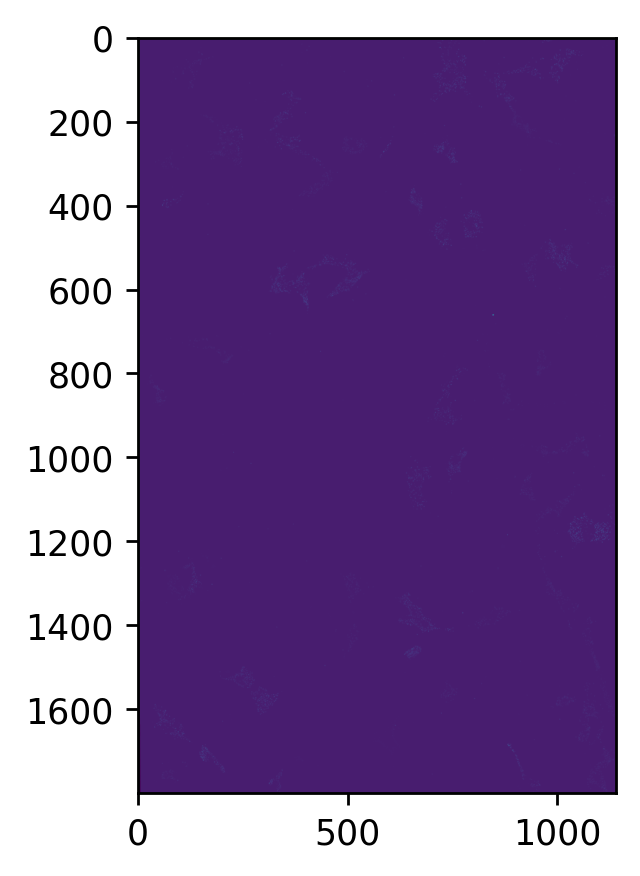

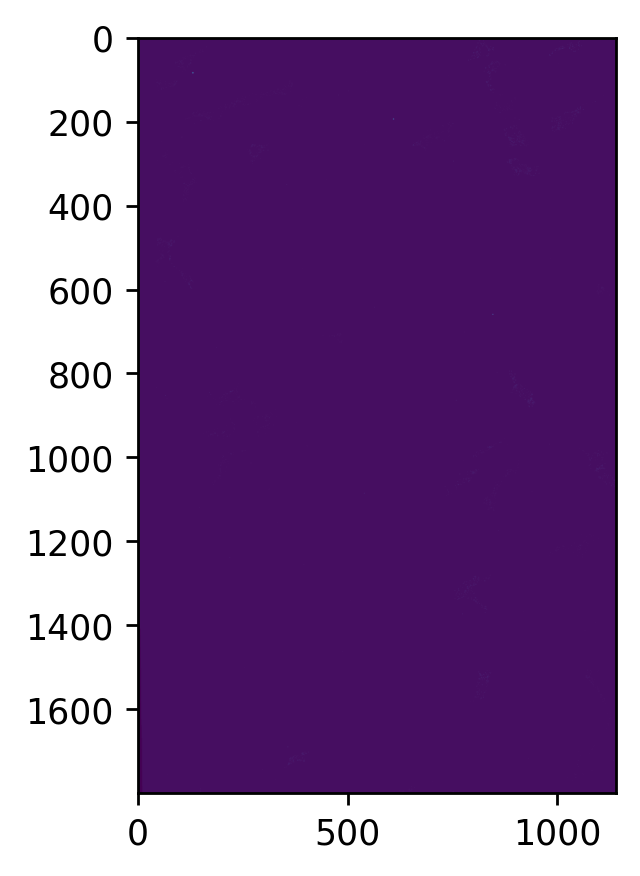

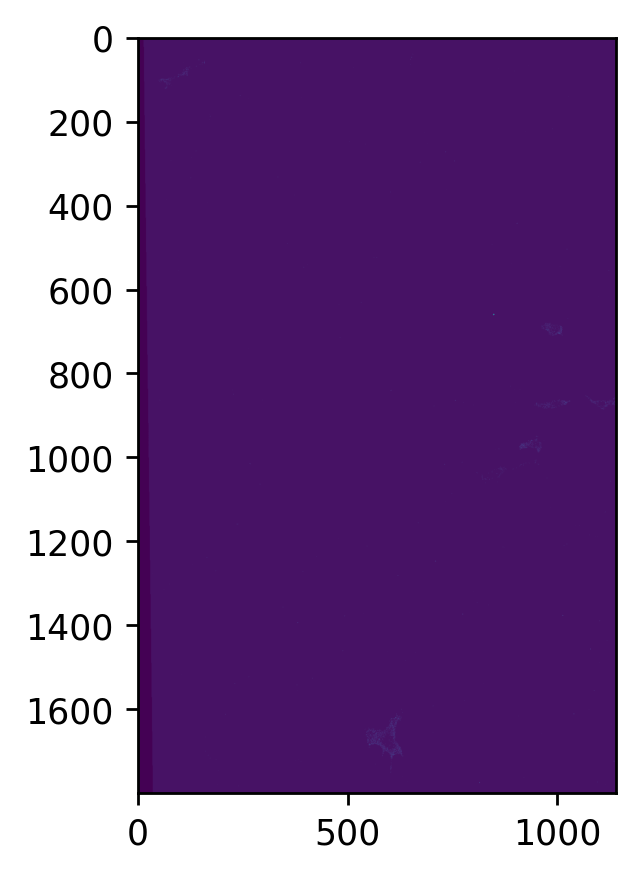

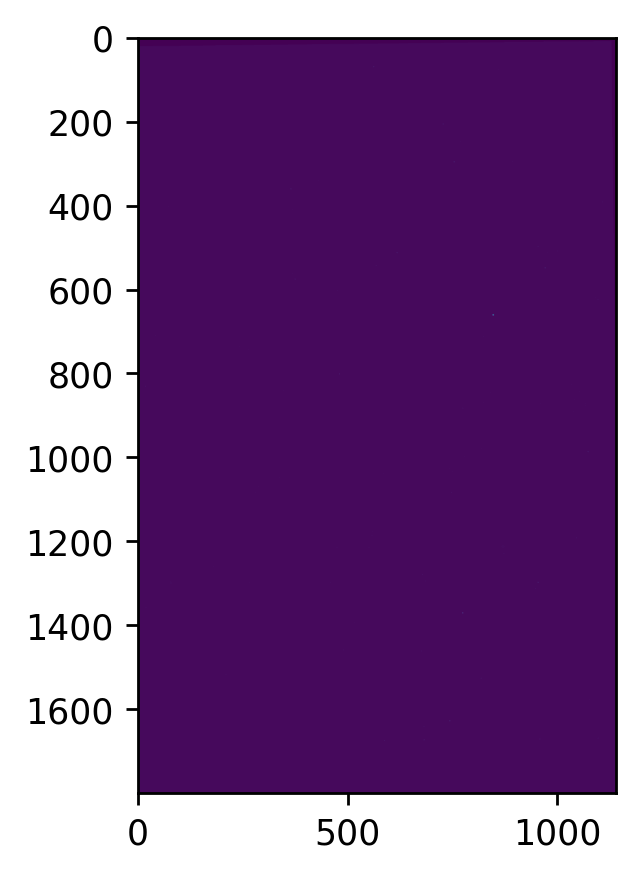

In [7]:
for i in range(Xcenter.shape[0]):
    plt.figure(dpi=250)
    plt.imshow(Xcenter[i, 0,])

## Codebook

The most important is to make sure the codebook and the images are of the same order

In [8]:
codebook = pd.read_csv('./data/CRISPRmap_pilot_codebook_default.csv', dtype=np.int, header=None)
codebook = np.array(codebook)
codebook

array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0]])

In [9]:
codebook.shape

(10, 10)

## Background subtraction

In [10]:
Xcenter.shape

(10, 1, 1800, 1140)

In [61]:
# imp = np.zeros((21, 21))
# imp[10, 10] = 1
# f_imp = ndimage.gaussian_filter(imp, sigma=3)
# np.set_printoptions(linewidth=120, precision=3)
# np.max(f_imp)
# # np.sum(f_imp)

0.01768488749356488

In [64]:
Xnorm = bardensr.preprocessing.background_subtraction(Xcenter, [0,10,10])
# Xnorm = Xcenter.copy()
# Xnorm = bardensr.preprocessing.minmax(Xnorm)
# # alpha = 30
# for i in range(Xcenter.shape[0]):
#     print(i, np.min(Xnorm[i, 0, ]), np.max(Xnorm[i, 0, ]))
#     # blurred = ndimage.gaussian_filter(Xcenter[i, 0, ], sigma=3)
#     blurred = ndimage.gaussian_filter(Xnorm[i, 0, ], sigma=3)
#     print(i, np.min(blurred), np.max(blurred))
    
# #     filter_blurred = ndimage.gaussian_filter(blurred, 1)
#     Xnorm[i, 0, ] = Xnorm[i, 0, ] - blurred
#     print(i, np.min(Xnorm[i, 0, ]), np.max(Xnorm[i, 0, ]))
# #     Xnorm[i, 0, ] = blurred + alpha * (blurred - filter_blurred)

Xnorm = bardensr.preprocessing.minmax(Xnorm)

0 0.0 1.0
0 0.0008936231318902214 0.21240761922836265
0 -0.15744353233509176 0.8959942621236366
1 0.0 1.0
1 0.008350146537229996 0.3389869897915082
1 -0.14969064661347536 0.7537417481199054
2 0.0 1.0
2 0.00012125388801234854 0.23900032473787586
2 -0.10044851270115882 0.8025319941520371
3 0.0 1.0
3 0.0 0.28693032021414266
3 -0.1621864102612322 0.7948513196147547
4 0.0 1.0
4 0.0 0.13265437612567438
4 -0.07045024799548871 0.8673456238743256
5 0.0 1.0
5 0.00048506266100038515 0.04865148050331834
5 -0.037465291803046204 0.9518032774882512
6 0.0 1.0
6 0.003341841051839212 0.13414147365666101
6 -0.059957910304128774 0.8658585263433389
7 0.0 1.0
7 3.328890350234724e-05 0.08329890124371565
7 -0.04396771865855623 0.916772534620351
8 0.0 1.0
8 0.0 0.10462068889783654
8 -0.05174049626019835 0.8963067687238195
9 0.0 1.0
9 0.0 0.07914697775793963
9 -0.044988571216208036 0.9208530222420603


In [12]:
Xnorm.shape

(10, 1, 1800, 1140)

<Figure size 600x400 with 0 Axes>

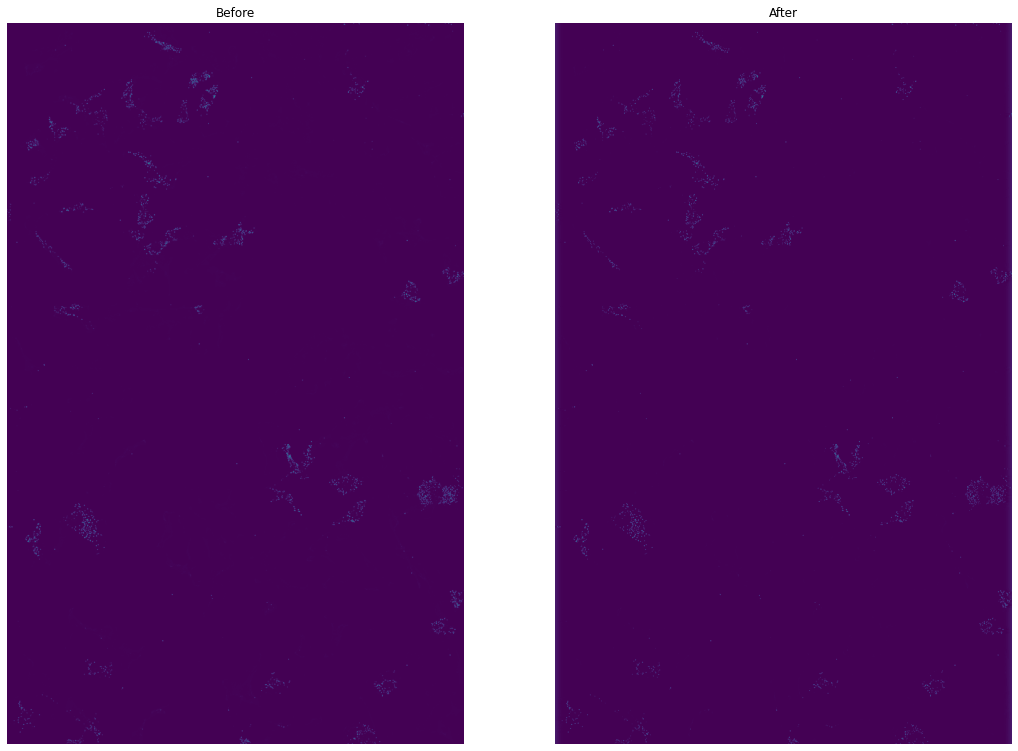

<Figure size 600x400 with 0 Axes>

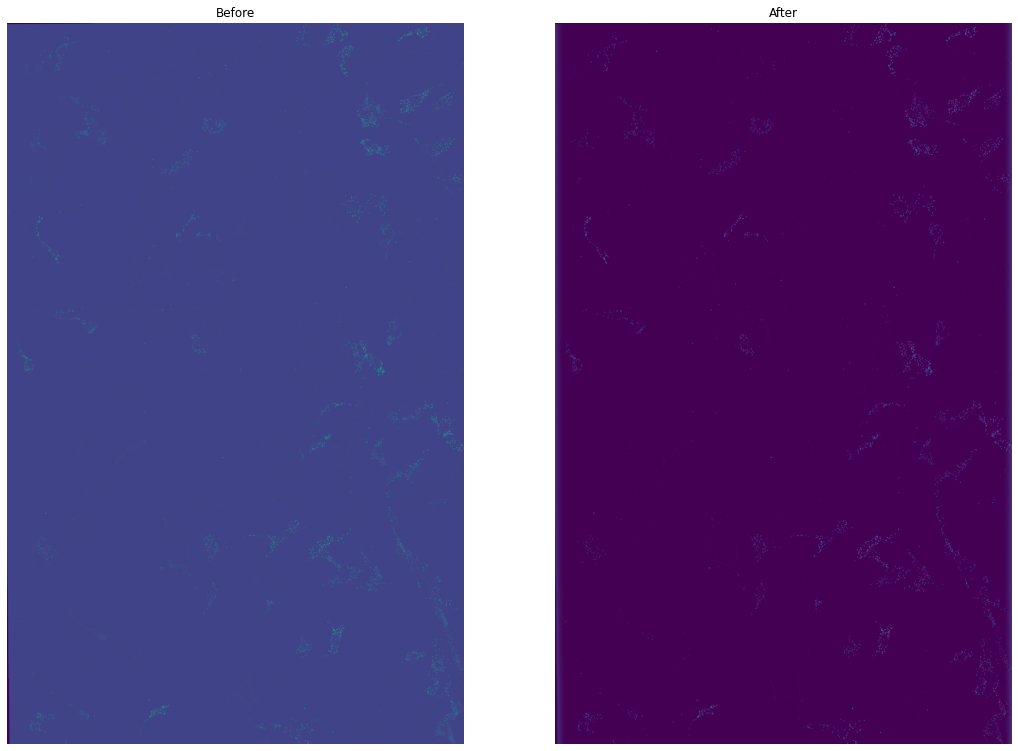

<Figure size 600x400 with 0 Axes>

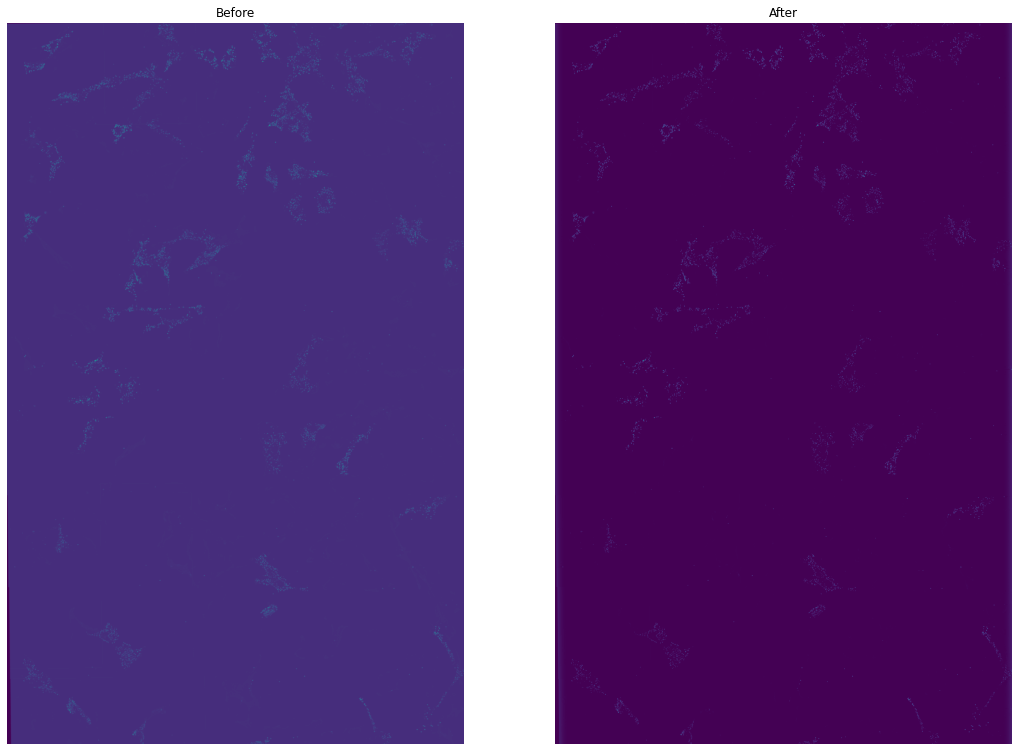

<Figure size 600x400 with 0 Axes>

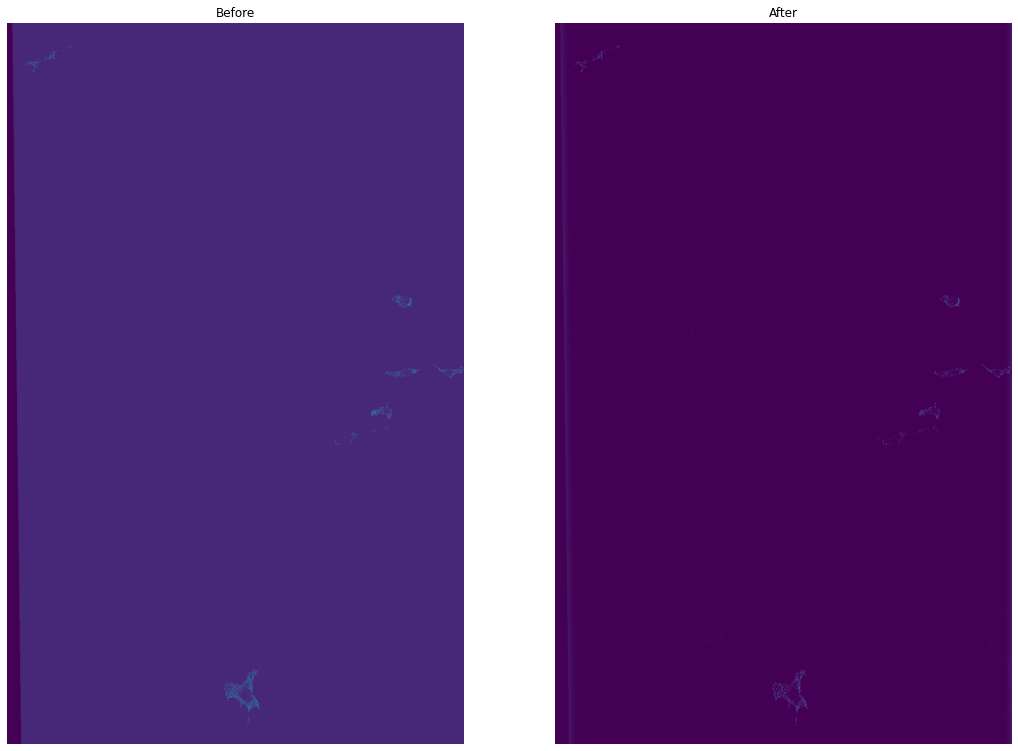

<Figure size 600x400 with 0 Axes>

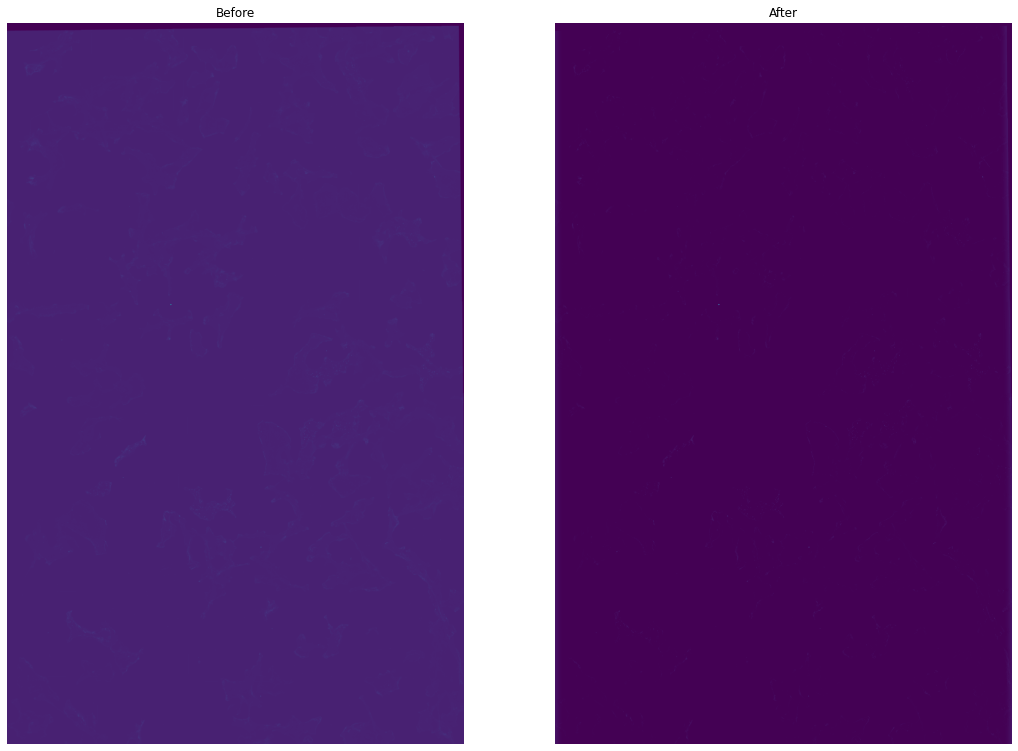

<Figure size 600x400 with 0 Axes>

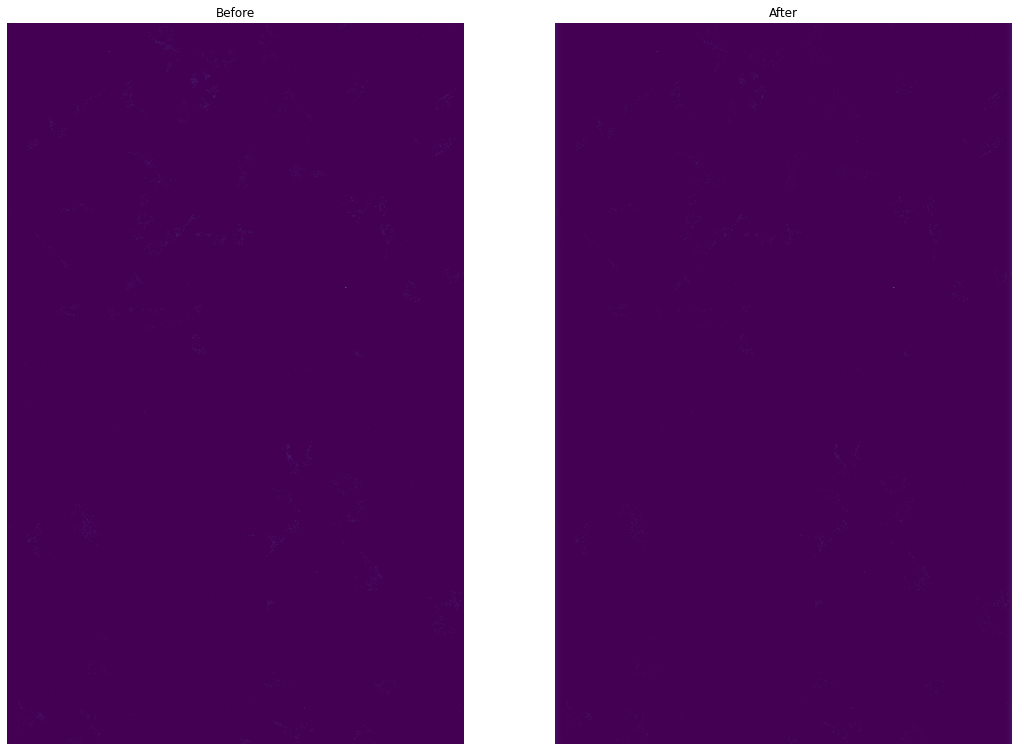

<Figure size 600x400 with 0 Axes>

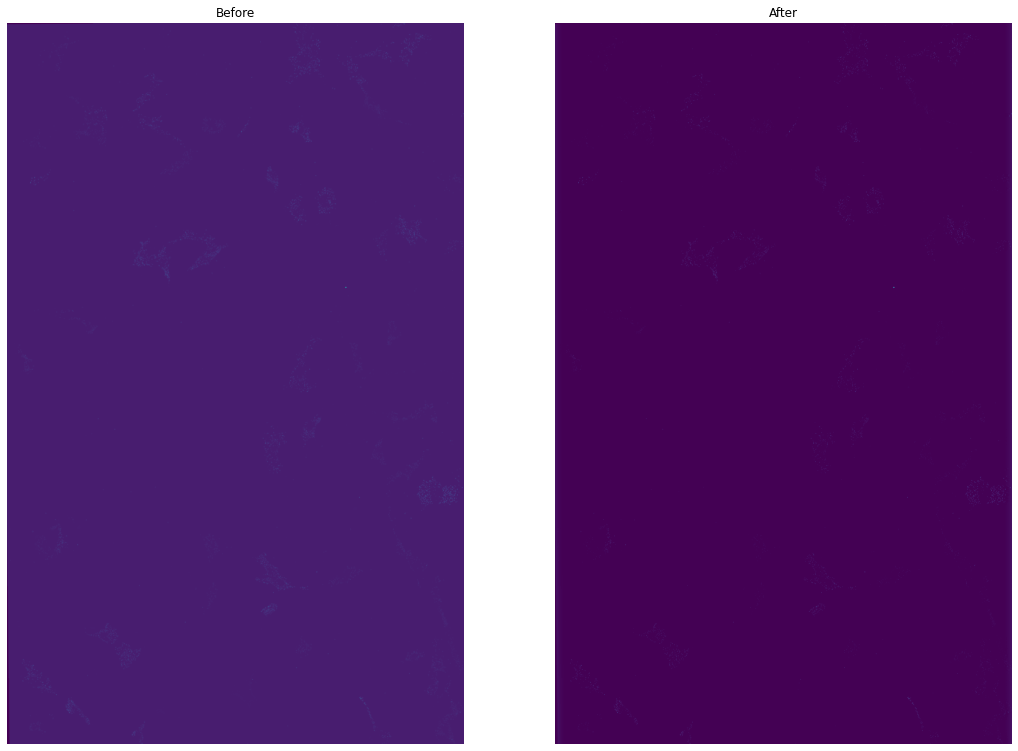

<Figure size 600x400 with 0 Axes>

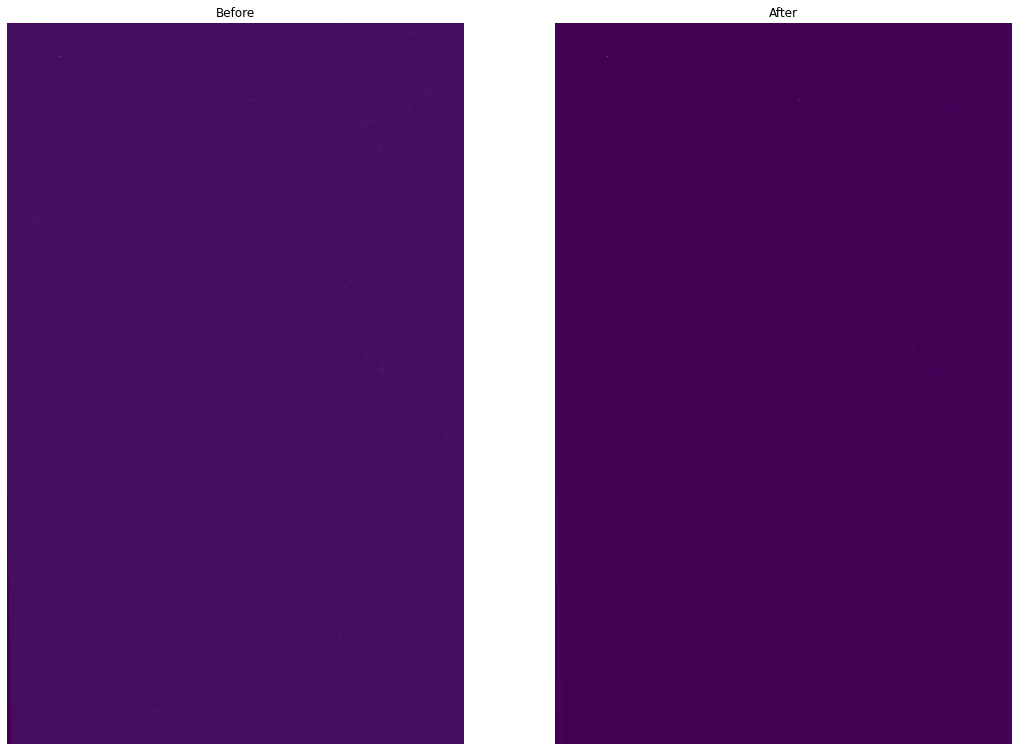

<Figure size 600x400 with 0 Axes>

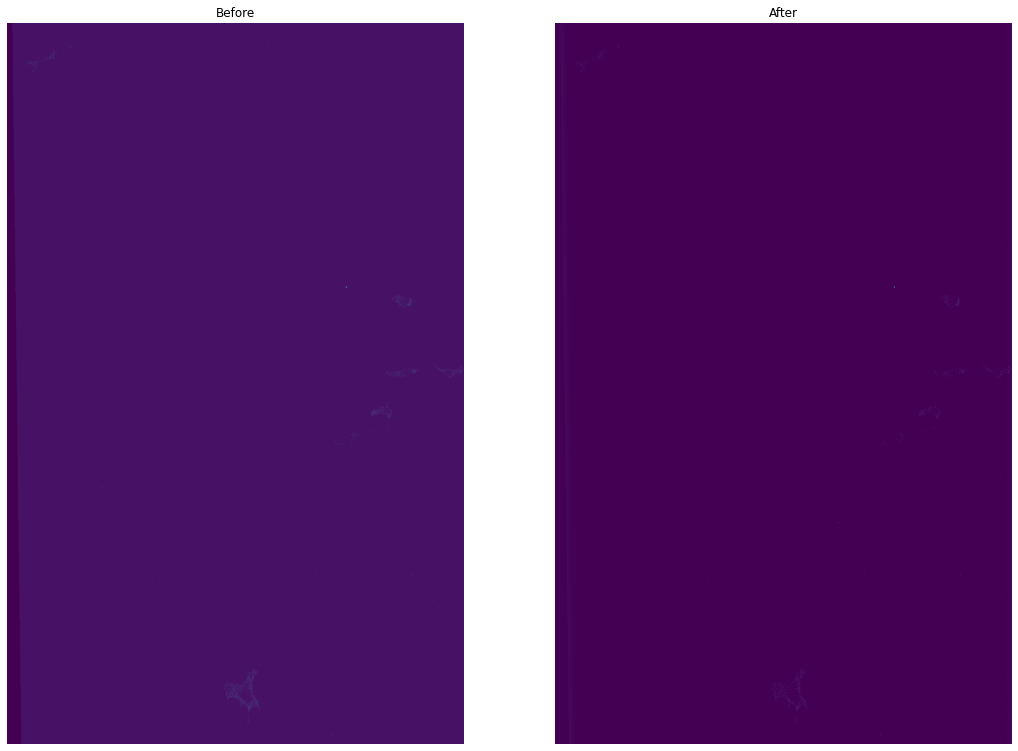

<Figure size 600x400 with 0 Axes>

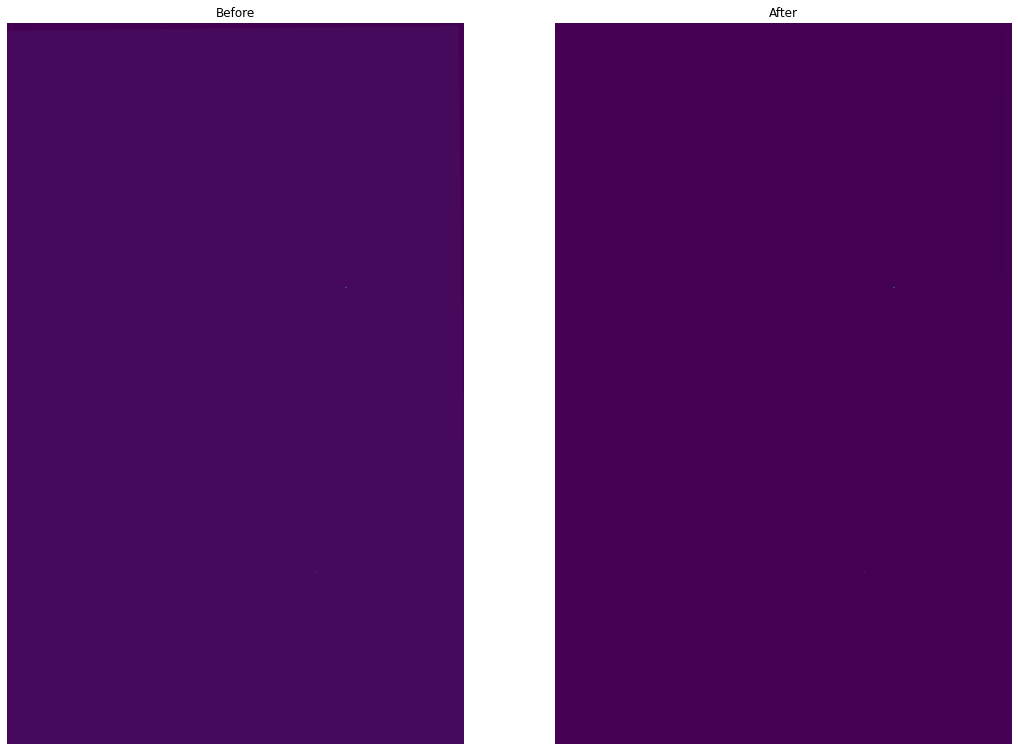

In [45]:
for i in range(Xnorm.shape[0]):
    plt.figure(dpi=100)
    fig, axes = plt.subplots(ncols=2, figsize=(18, 18))
    ax = axes.ravel()

    ax[0].imshow(Xcenter[i, 0])
    ax[0].set_title('Before')

    ax[1].imshow(Xnorm[i, 0])
    ax[1].set_title('After')

    for a in ax:
        a.axis('off')

    plt.show()

## Thresholding

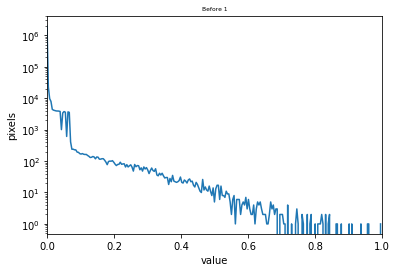

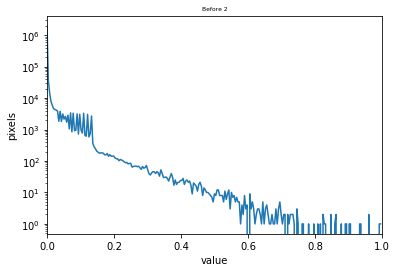

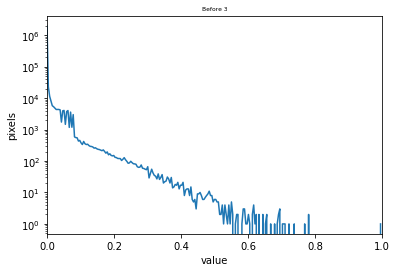

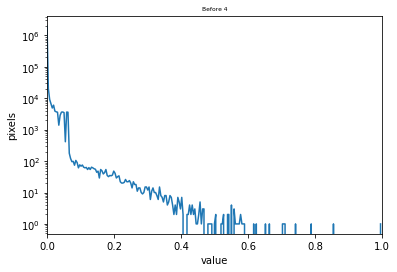

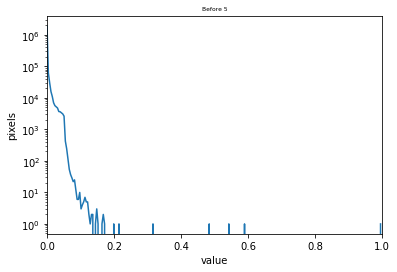

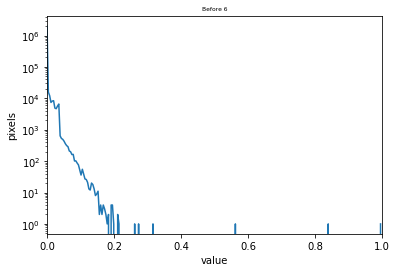

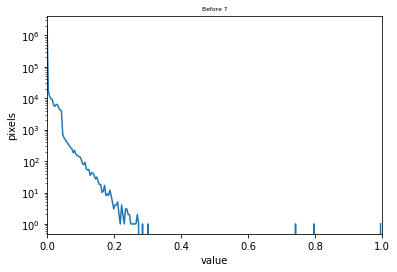

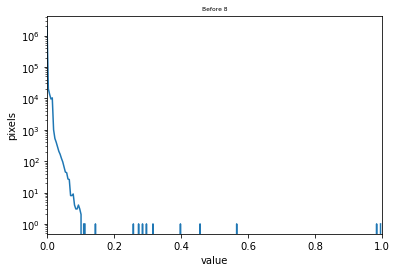

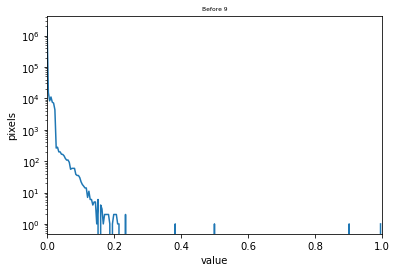

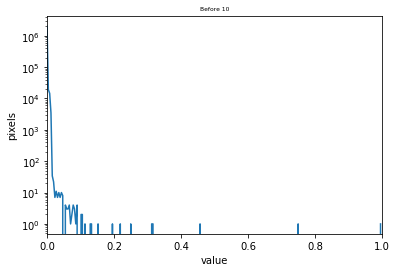

In [46]:
# Distributions before thresholding
for i in range(Xnorm.shape[0]):
    histogram, bin_edges = np.histogram(Xnorm[i, 0, ], bins=256, range=(0, 1))
    plt.figure()
    plt.title(f"Before {i+1}", fontsize=6)
    plt.xlabel("value")
    plt.ylabel("pixels")
    plt.semilogy(bin_edges[0:-1], histogram)
    plt.xlim([0.0, 1.0])
    plt.show()

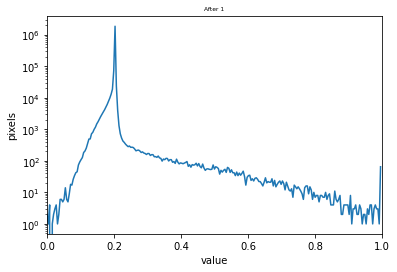

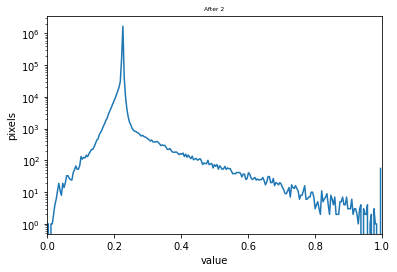

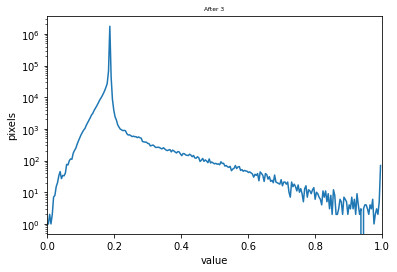

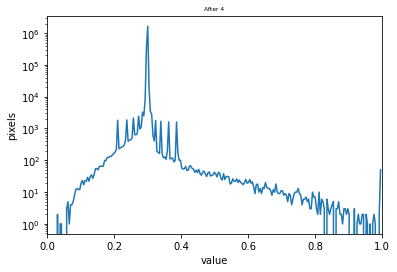

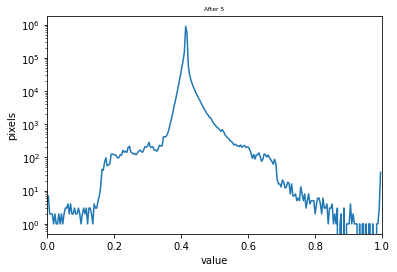

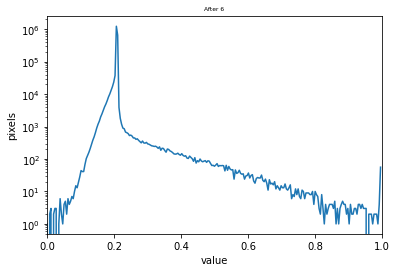

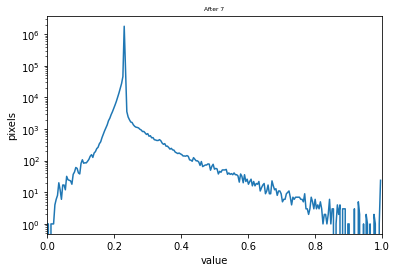

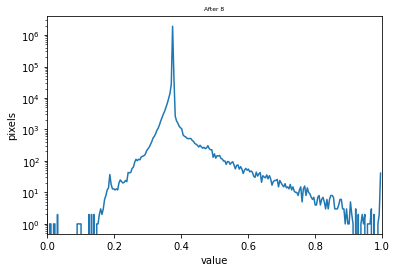

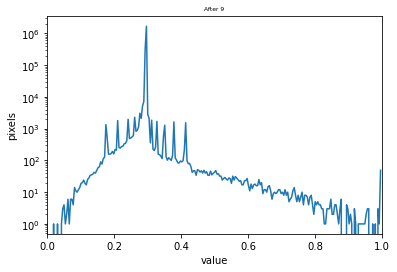

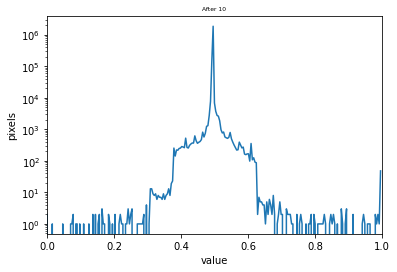

In [42]:
# Don't split this cell
upper = dcp.upper_thresh(Xnorm, n_channels=n_channels, n_cycles=n_cycles, min_bin=5)
Xthresh = dcp.upper_collapse(Xnorm, upper)
Xthresh = bardensr.preprocessing.minmax(Xthresh)
# After
for i in range(Xthresh.shape[0]):
    histogram, bin_edges = np.histogram(Xthresh[i, 0, ], bins=256, range=(0, 1))
    plt.figure()
    plt.title(f"After {i+1}", fontsize=6)
    plt.xlabel("value")
    plt.ylabel("pixels")
    plt.semilogy(bin_edges[0:-1], histogram)
    plt.xlim([0.0, 1.0])
    plt.show()
# Xthresh = dcp.lower_thresh(Xthresh)

<Figure size 600x400 with 0 Axes>

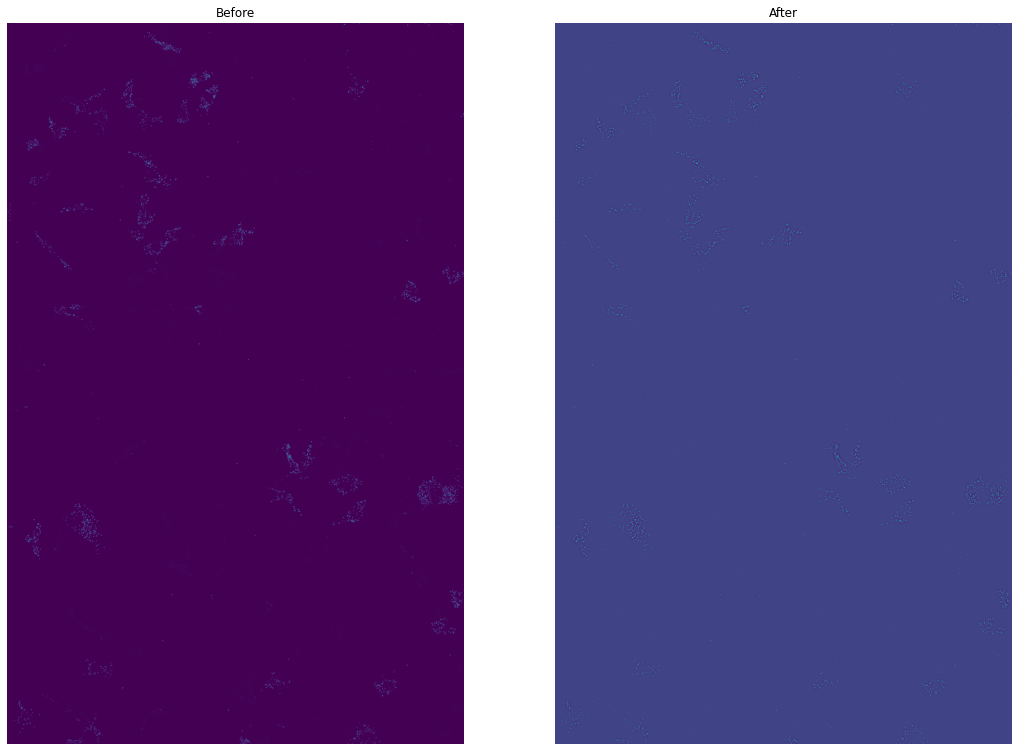

<Figure size 600x400 with 0 Axes>

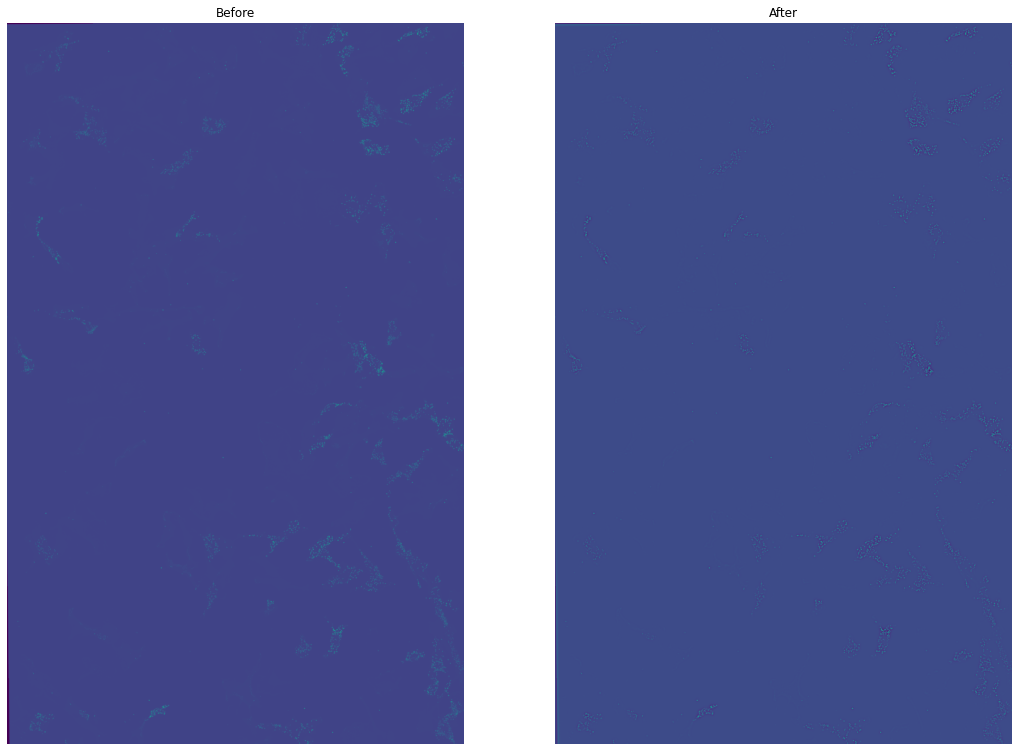

<Figure size 600x400 with 0 Axes>

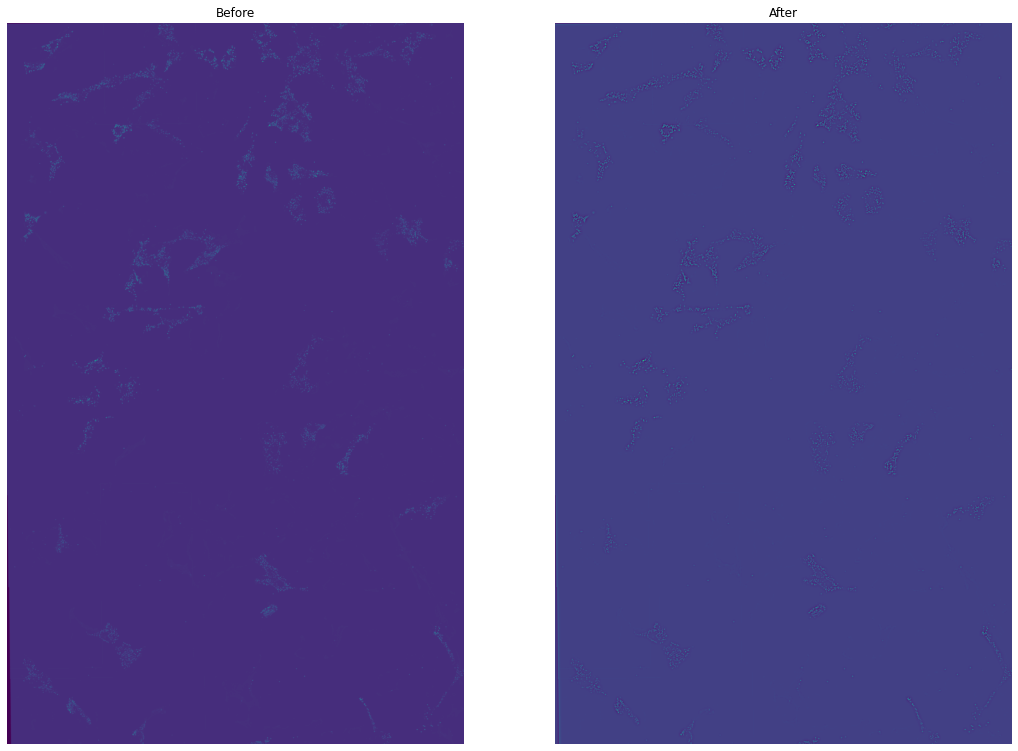

<Figure size 600x400 with 0 Axes>

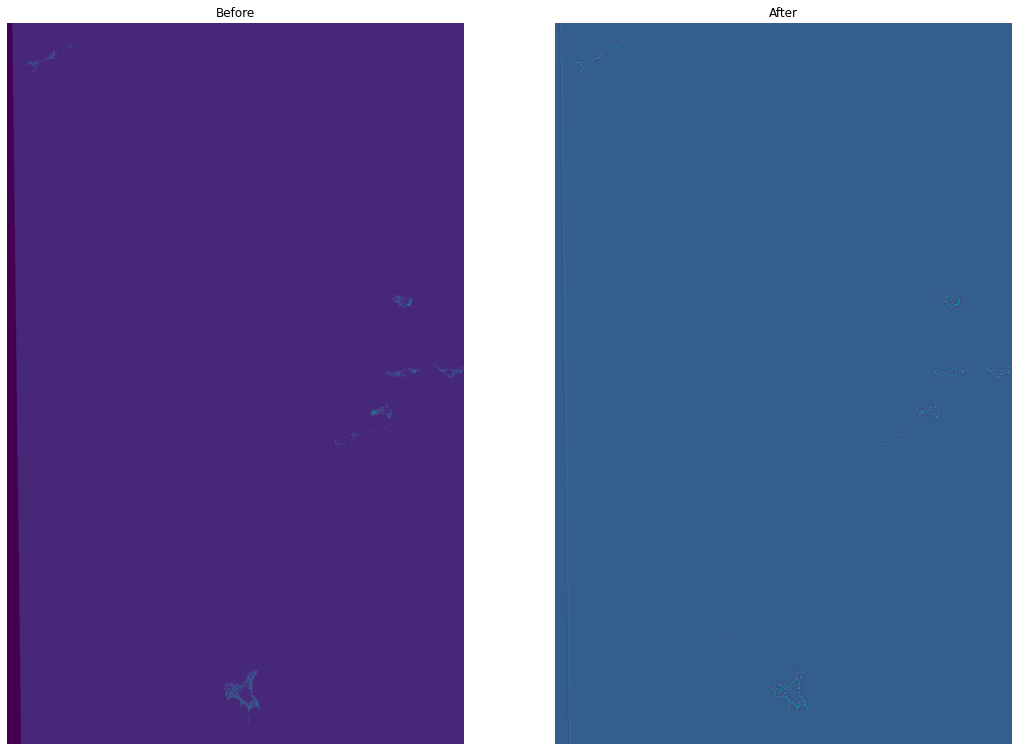

<Figure size 600x400 with 0 Axes>

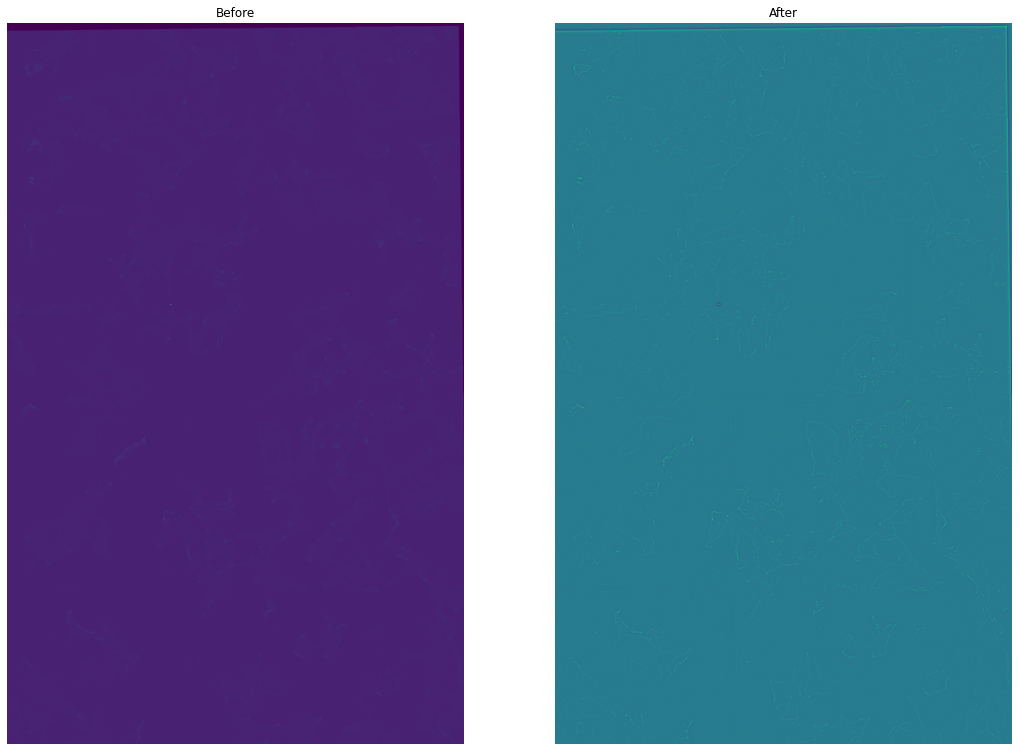

<Figure size 600x400 with 0 Axes>

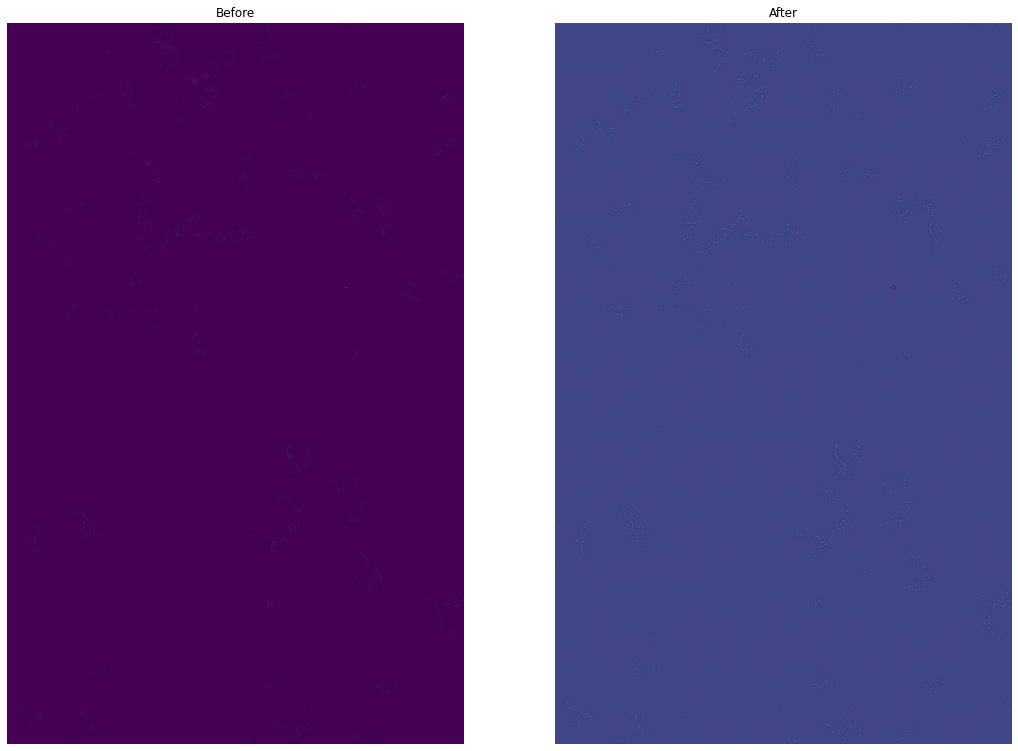

<Figure size 600x400 with 0 Axes>

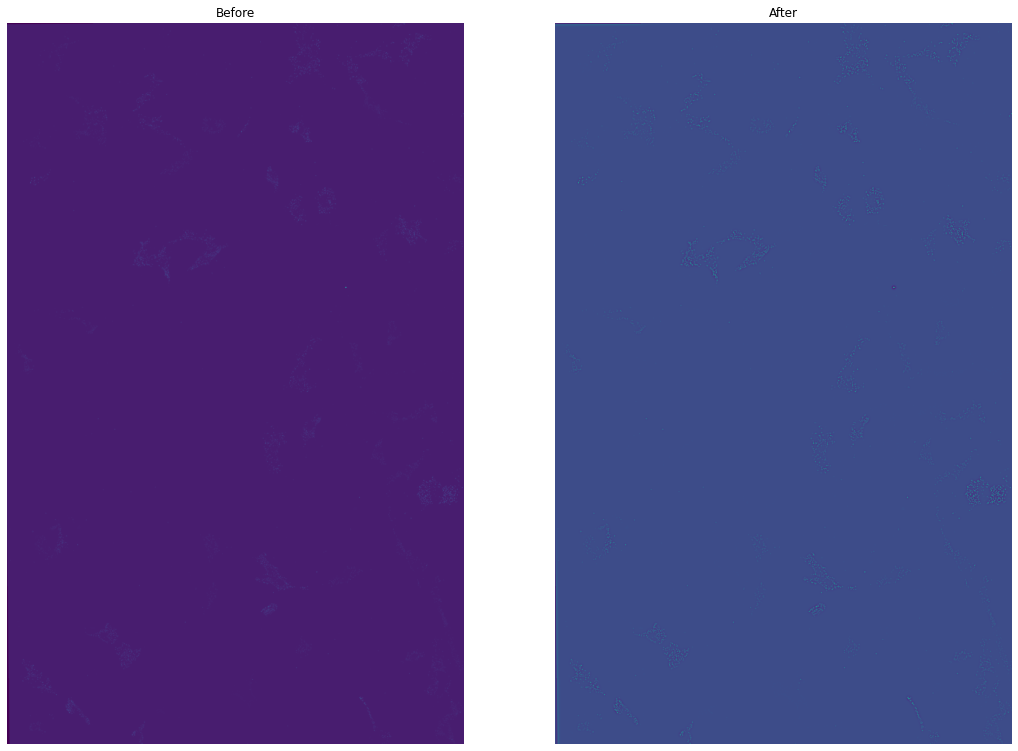

<Figure size 600x400 with 0 Axes>

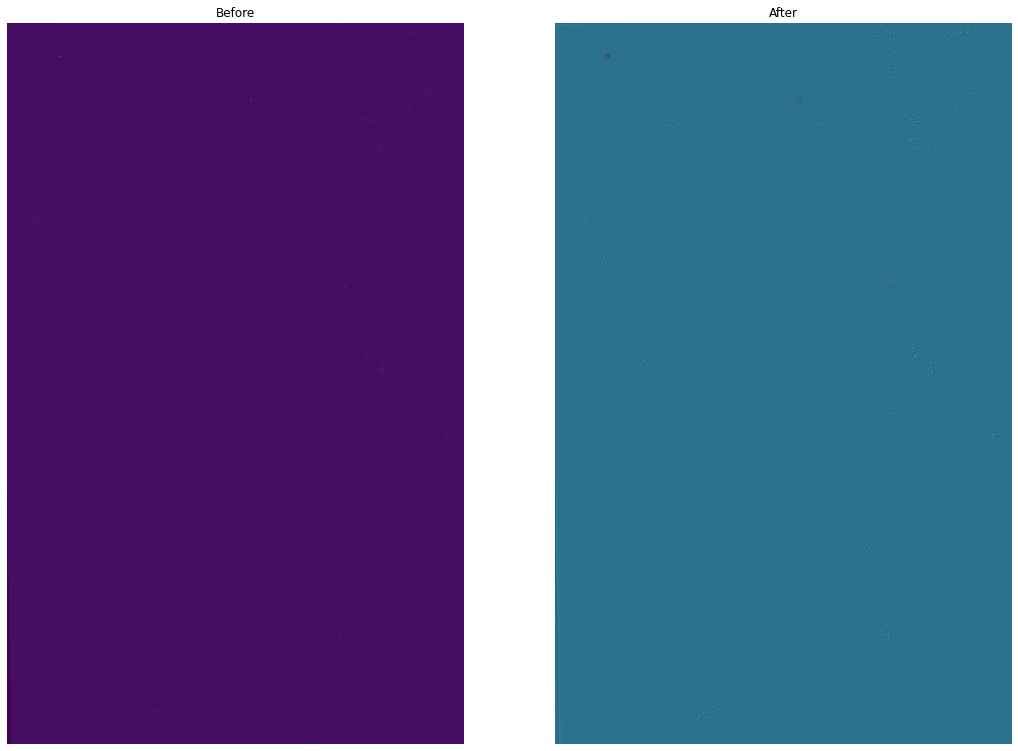

<Figure size 600x400 with 0 Axes>

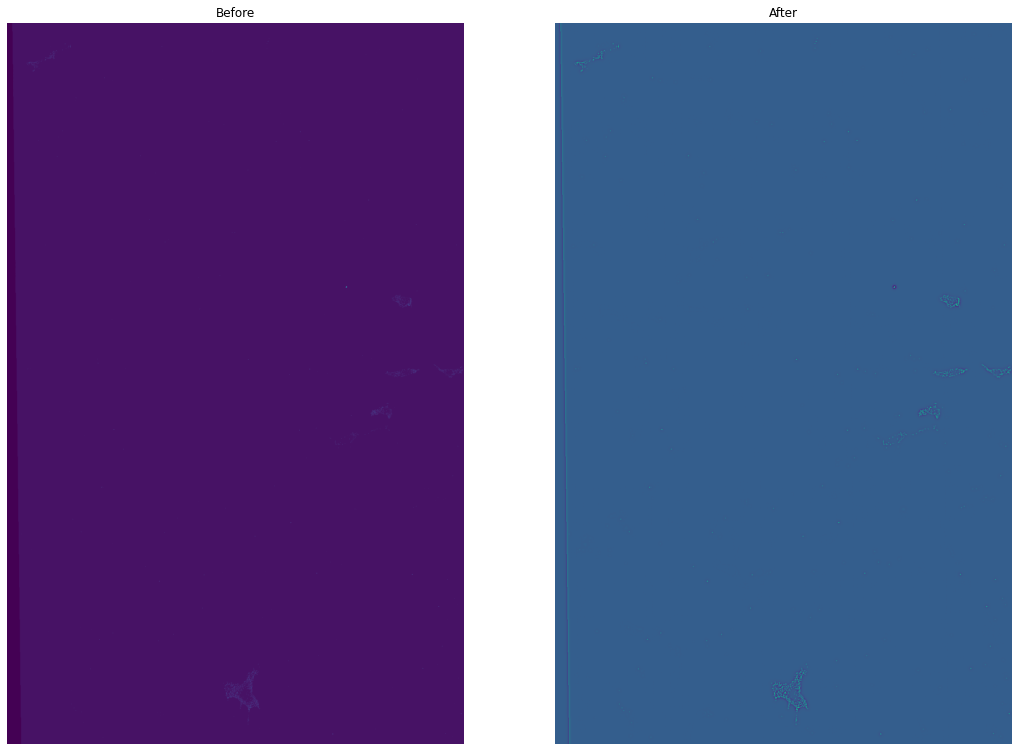

<Figure size 600x400 with 0 Axes>

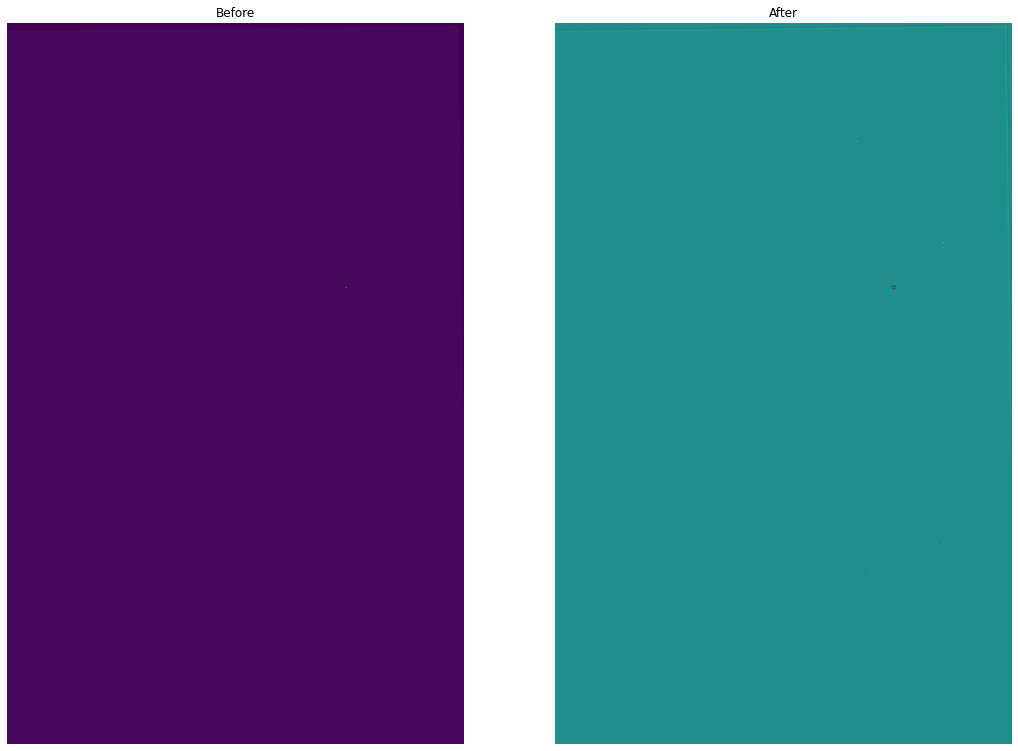

In [43]:
for i in range(Xthresh.shape[0]):
    plt.figure(dpi=100)
    fig, axes = plt.subplots(ncols=2, figsize=(18, 18))
    ax = axes.ravel()

    ax[0].imshow(Xcenter[i, 0])
    ax[0].set_title('Before')

    ax[1].imshow(Xthresh[i, 0])
    ax[1].set_title('After')

    for a in ax:
        a.axis('off')

    plt.show()

## Prediction

In [15]:
# Read in the membrane segmentation
with open('./data/20210714masks_mem.npy', 'rb') as m:
    masks_mem = np.load(m)

In [16]:
cell_table = dcp.create_celltable(Xthresh, masks_mem, up_adjust=up, left_adjust=left)
cell_table

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 5., 7., ..., 9., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# pd.DataFrame(cell_table).to_csv('./result/crisprmap20210714sg2NEB_cell_table.csv')

In [18]:
cell_table.shape

(336, 10)

In [26]:
cell_corr = dcp.cal_metric(cell_table, codebook)
corr_thresh = 0.001
alpha = 0.05  
beta = 0.8  # power
thresh_corr_diff = 0.26
cell_id = pd.DataFrame(dcp.argmax_thresh(cell_corr, axis=1, thresh=corr_thresh), columns=['barcode'])
cell_id['correlation_max'] = dcp.minmax(np.max(cell_corr, axis=1), min_all=np.min(cell_corr), max_all=np.max(cell_corr))
cell_id['correlation_2nd_max'] = dcp.minmax([heapq.nlargest(2, cell_corr[i,])[1] for i in cell_id.index], min_all=np.min(cell_corr), max_all=np.max(cell_corr))
cell_id['correlation_difference'] = cell_id['correlation_max'] - cell_id['correlation_2nd_max']
cell_id['select_by_correlation'] = cell_id['correlation_difference'] > thresh_corr_diff
cell_id['spots_max'] = np.max(cell_table, axis=1)
cell_id['spots_sum'] = np.sum(cell_table, axis=1)
cell_id['spots_needed'] = cell_id['correlation_max'].apply(dcp.sample_size, alpha=alpha, beta=beta)
cell_id['select_by_spots'] = cell_id['spots_sum'] > cell_id['spots_needed']
cell_id['selected'] = cell_id['select_by_correlation'] & cell_id['select_by_spots']
cell_id.head()

barcode  correlation_max  correlation_2nd_max  correlation_difference  \
0       -1         0.000000             0.000000                0.000000   
1        4         0.707106             0.707106                0.000000   
2        4         0.812277             0.710742                0.101535   
3        0         0.989949             0.565685                0.424264   
4        6         0.987935             0.564535                0.423401   

   select_by_correlation  spots_max  spots_sum    spots_needed  \
0                  False        0.0        0.0  31395550336760   
1                  False        1.0        1.0              13   
2                  False        9.0       30.0               9   
3                   True        4.0        7.0               4   
4                   True       28.0       52.0               4   

   select_by_spots  selected  
0            False     False  
1            False     False  
2             True     False  
3             True      True  
4             True      True

In [35]:
print("The number of cells:", cell_id.shape[0]-1)
cell_no_spots = cell_id[cell_id.barcode==-1].shape[0]
print("The number of cells with no detected spots:", cell_no_spots)
double_infected = cell_id.shape[0] -1 - cell_no_spots - np.sum(cell_id.select_by_correlation)
print("The number of double-infected cells:", double_infected)
print("Percent of double-infected cells:", double_infected / (cell_id.shape[0] -1))
low_spots = cell_id.shape[0] - 1 - np.sum(cell_id.select_by_spots)
print("The number of cells that do not have enough spots to calculate a significant correlation or no spots:", low_spots)
print("Percent of cells that do not have enough spots to calculate a significant correlation or no spots:", low_spots / (cell_id.shape[0] -1))
print("The number of cells selected after removing double infection and low number of spots:", np.sum(cell_id.selected))
print("Percent of cells selected after removing double infection and low number of spots:", np.sum(cell_id.selected) / (cell_id.shape[0] -1))

The number of cells: 335
The number of cells with no detected spots: 83
The number of double-infected cells: 97
Percent of double-infected cells: 0.28955223880597014
The number of cells that do not have enough spots to calculate a significant correlation or no spots: 134
Percent of cells that do not have enough spots to calculate a significant correlation or no spots: 0.4
The number of cells selected after removing double infection and low number of spots: 132
Percent of cells selected after removing double infection and low number of spots: 0.3940298507462687


In [20]:
# cell_id.to_csv('./result/crisprmap20210714sg2NEB_picklemax_cell_id_all.csv', index=False)

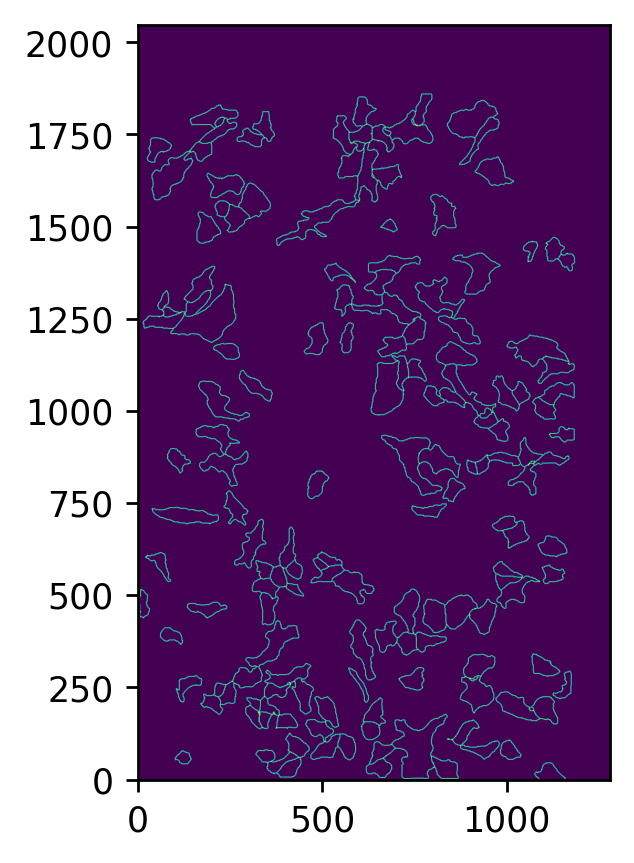

In [21]:
high_quality = cell_id[cell_id['correlation_difference']>0.26]
high_quality_mem = np.zeros(masks_mem.shape)
for i in high_quality.index:
    high_quality_mem[np.array(masks_mem)==i] = i
plt.figure(dpi=250)
plt.imshow(find_boundaries(high_quality_mem), origin='lower')